### Описание проекта

Анализ данных вакансий HH.ru 

Менеджеры по персоналу и потенциальные работники ИТ сферы не знают, как обстоят дела на рынке труда. Расмотрим две специальности: Системный аналитик и аналитик данных. 

Требуется выяснить, какая специальность более востребованная, как оплачивается, какие особенности у той и другой профессии.
Цель проекта: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.
Нам доступно два датасета из вакансий на сайте HH.ru с одинаковыми полями.

Описание полей:
id - Уникальный идентификатор вакансии.
name - Название вакансии.
published_at - Дата публикации.
alternate_url - Ссылка на вакансию.
type - Статус вакансии на момент получения данных от api и передачи
их в базу.
employer - Работодатель.
department - Работодатель, отдел.
area - Регион места работы.
experience - Требуемый опыт работы.
key_skills - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api.
schedule - График работы.
employment - Тип занятости.
description - Описание вакансии.
description_lemmatized - Лемматизированное описание вакансии.
salary_from - Нижняя граница предлагаемой заработной платы.
salary_to - Верхняя граница предлагаемой заработной платы.
salary_bin - Категория зарплаты.
key_skills_from_key_skills_field - Ключевые навыки из поля вакансии
key_skills.
hard_skills_from_description - “Твердые” навыки, найденные при
обработке полей с навыками. Поле генерируется после получения
информации от api. soft_skills_from_description - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после
получения информации от api.

### 1. Подготовка данных

In [81]:
#импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from IPython.display import display
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np

In [82]:
# загрузим и прочитаем датасеты
df1= pd.read_excel(r'C:\Users\serge\Desktop\Aналитика_hh_(da+sa)\vacancies_sa.xlsx')

In [83]:
df2= pd.read_excel(r'C:\Users\serge\Desktop\Aналитика_hh_(da+sa)\vacancies_da (1).xlsx')

In [177]:
# посмотрим на датафрейм
df1.head(3)

,id,name,published_at,employer,department,area,experience,key_skills,schedule,employment,desc,desc_lm,salary_from,salary_to,salary_bin,key_ski,hard_ski,soft_ski
0,100046399,Системный аналитик,2024-07-08 10:22:57,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,,,Документация


In [85]:
# всторой датафрейм с теми же столбцами
df2.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

In [87]:
# поменяем названия столбцов на более короткие и лаконичные
df1=df1.rename(columns = {'description':'desc', 'description_lemmatized':'desc_lm','key_skills_from_key_skills_field':'key_ski',
                        'hard_skills_from_description':'hard_ski', 'soft_skills_from_description':'soft_ski'})

In [88]:
df2=df2.rename(columns = {'description':'desc', 'description_lemmatized':'desc_lm','key_skills_from_key_skills_field':'key_ski',
                        'hard_skills_from_description':'hard_ski', 'soft_skills_from_description':'soft_ski'})

In [89]:
# проверим столбец "тип" вакансии
df1.type.unique()

array(['Открытая'], dtype=object)

In [90]:
#дропнем столбец с ненужными ссылками и ненужный столбце `type`, так как там все открытые вакансии
df1.drop(columns=['alternate_url', 'type'], inplace=True)

In [91]:
df2.drop(columns=['alternate_url', 'type'], inplace=True)

In [136]:
df1.head(5)

,id,name,published_at,employer,department,area,experience,key_skills,schedule,employment,desc,desc_lm,salary_from,salary_to,salary_bin,key_ski,hard_ski,soft_ski
0,100046399,Системный аналитик,2024-07-08 10:22:57,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,,,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",,


#### Дубликаты

In [92]:
#ищем дубликаты по всему датафрейму - их нет 
df1[df1.duplicated(['id','name'], keep=False)]

,id,name,published_at,employer,department,area,experience,key_skills,schedule,employment,desc,desc_lm,salary_from,salary_to,salary_bin,key_ski,hard_ski,soft_ski


In [93]:
df1[df1.duplicated(['id','name'], keep=False)] #по второму датафрейму тоже нет, смотрим отдельно по столбцам

,id,name,published_at,employer,department,area,experience,key_skills,schedule,employment,desc,desc_lm,salary_from,salary_to,salary_bin,key_ski,hard_ski,soft_ski


In [94]:
df1[df1.duplicated(['id'], keep=False)] # видим дубликаты, просто даты публикации разные, удаляем

,id,name,published_at,employer,department,area,experience,key_skills,schedule,employment,desc,desc_lm,salary_from,salary_to,salary_bin,key_ski,hard_ski,soft_ski


In [95]:
#df1= df1.drop_duplicates(['id'])

In [96]:
df2[df2.duplicated(['desc','name','employment','area','experience','key_ski','hard_ski', 'salary_from'], keep=False)].head(6)

,id,name,published_at,employer,department,area,experience,key_skills,schedule,employment,desc,desc_lm,salary_from,salary_to,salary_bin,key_ski,hard_ski,soft_ski
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
6,100060772,Аналитик данных,2024-05-24 11:56:20,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN
7,100069131,Дата аналитик,2024-05-24 13:05:01,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",Полный день,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность"
13,100080293,Data analyst / Аналитик данных,2024-05-24 14:36:52,Колл Солюшенс,NaN,Санкт-Петербург,Middle (3-6 years),"['Анализ данных', 'Проактивность', 'SQL', 'Pyt...",Полный день,Полная занятость,обязанности: исследование поведения пользова...,обязанность исследование поведение пользовател...,NaN,NaN,ЗП не указана,"SQL, Python, Airflow, Анализ данных, Базы данн...",NaN,Проактивность
14,100082545,Аналитик данных (Отдел по анализу конкурентов),2024-06-05 11:38:18,Ozon,Ozon Офис и Коммерция,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,вам предстоит: осуществлять многофакторный а...,предстоять осуществлять многофакторный анализ ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
25,100114196,Аналитик данных CV (Северсталь Диджитал),2024-05-24 21:36:31,Северсталь,Северсталь. IT & Digital,Москва,Junior+ (1-3 years),"['Deep Learning', 'PyTorch', 'Python', 'OpenCV...",Удаленная работа,Полная занятость,«северсталь диджитал» - эксперт в области цифр...,северсталь диджитать эксперт область цифровой ...,NaN,NaN,ЗП не указана,"OpenCV, Python, Deep Learning, Аналитическое м...",NaN,NaN


Потенциально у нас еще 200 дубликатов, однако я бы не стал удалять, так как может в компаниях требуется несколько специалистов одного направления

#### Пропуски

In [139]:
df1.hard_ski.unique()

array(['confluence', '', 'confluence, Юнит-экономика', 'Юнит-экономика',
       'Pandas'], dtype=object)

В полях с информацией о навыках есть пропуски, которые отображаются как ''. 
Учитывая это посчитаю количество пропусков в каждом поле 

In [178]:
datasets = [('Системный аналитик', df1), ('Аналитик данных', df2)]
# Цикл по каждому датафрейму
for name, df in datasets:
    missing_values = df.isnull().sum() + df.eq('').sum()
    total_rows = len(df)
    missing_percentage = (missing_values / total_rows) * 100
    missing_df = pd.DataFrame({
        'Пропуски (NaN + Пустые строки)': missing_values,
        'Доля пропусков (%)': missing_percentage
    })
   
    print(missing_df)

              Пропуски (NaN + Пустые строки)  Доля пропусков (%)
id                                         0            0.000000
name                                       0            0.000000
published_at                               0            0.000000
employer                                   0            0.000000
department                              1554           81.148825
area                                       0            0.000000
experience                                 0            0.000000
key_skills                                 0            0.000000
schedule                                   0            0.000000
employment                                 0            0.000000
desc                                       0            0.000000
desc_lm                                    0            0.000000
salary_from                             1559           81.409922
salary_to                               1636           85.430809
salary_bin               

Много пропусков в столбцах про salary, это сильно усложнит анализ зарплат. Также много пропусков в department (но это не очень важно).
Довольно много пропусков в полях про навыки: больше всего в поле hard_skills, меньше - в key_skills. В вакансиях аналика данных больше пропусков в навыках, чем у системного аналитика

### 2.	Исследовательский анализ данных

Здесь хочу изучить поля, которые позже буду анализировать. 
Наименее информативными являются поля с информацией о зарплате

Посмотрел, как формируется поле salary_bin: оно имеет значение отличное от "ЗП не указана", когда salary_from и salary_to не пустые. 
Об этом говорит еще то, что количество пропусков в salary_to равно пропускам salary_bin
При подсчете средней зарплаты буду опираться на salary_from и salary_to, тк эти поля более информативны, чем salary_bin

In [99]:
filtered_df1 = df1[(df1['salary_from'].notna()) & 
                   (df1['salary_to'].notna()) & 
                   (df1['salary_bin'] != "ЗП не указана")]
filtered_df1[['salary_from', 'salary_to', 'salary_bin']].head(5)

,salary_from,salary_to,salary_bin
23,120000.0,180000.0,От 100 тысяч до 200 тысяч
43,80000.0,92000.0,Меньше 100 тысяч
55,250000.0,400000.0,Больше 300 тысяч
80,150000.0,225000.0,От 200 тысяч до 300 тысяч
101,80000.0,115000.0,От 100 тысяч до 200 тысяч


Посмотрю, как распределены значения в поле salary_bin:

In [100]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

for label, df in dfs:
    print(f"Результаты для {label}:\n")
    
    # Подсчет уникальных значений и их количества в столбце 'salary_bin'
    salary_bin_counts = df['salary_bin'].value_counts()
    
    # Подсчет доли 
    salary_bin_ratios = df['salary_bin'].value_counts(normalize=True)
    
    result = pd.DataFrame({
        'Количество': salary_bin_counts,
        'Доля': salary_bin_ratios
    })
    print(result)
    print("\n" + "-"*50 + "\n")

Результаты для Системный аналитик:

                           Количество      Доля
ЗП не указана                    1636  0.854308
Больше 300 тысяч                   82  0.042820
От 200 тысяч до 300 тысяч          81  0.042298
От 100 тысяч до 200 тысяч          75  0.039164
Меньше 100 тысяч                   41  0.021410

--------------------------------------------------

Результаты для Аналитик данных:

                           Количество      Доля
ЗП не указана                    1573  0.873404
От 100 тысяч до 200 тысяч          96  0.053304
Меньше 100 тысяч                   68  0.037757
От 200 тысяч до 300 тысяч          36  0.019989
Больше 300 тысяч                   28  0.015547

--------------------------------------------------



В поле salary_bin только 15% и 13% заполненных значений для системных аналитиков и аналитиков данных соответсвенно. В будущем не буду использовать это поле для анализа 


In [ ]:
Построю диаграмму разброса значений зарплат, чтобы получить общее представление

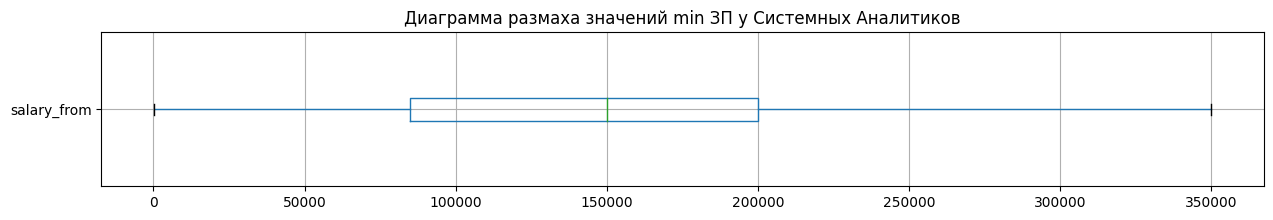

In [101]:
fig, ax = plt.subplots(figsize = (15,2))
ax = df1[['salary_from']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений min ЗП у Системных Аналитиков');
#ax.set_xlim(330000, 405000)

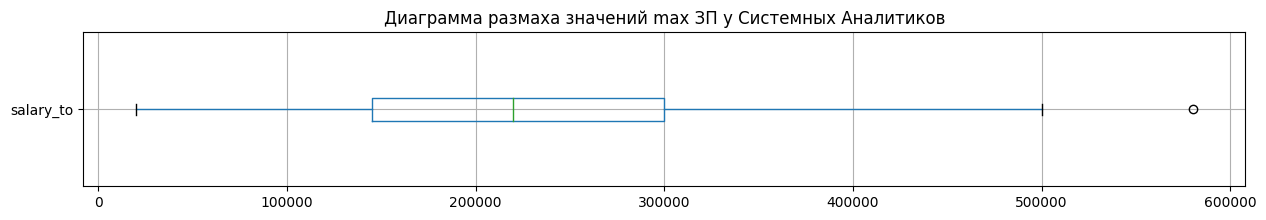

In [102]:
fig, ax = plt.subplots(figsize = (15,2))
ax = df1[['salary_to']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений max ЗП у Системных Аналитиков');
#ax.set_xlim(0, 15000);

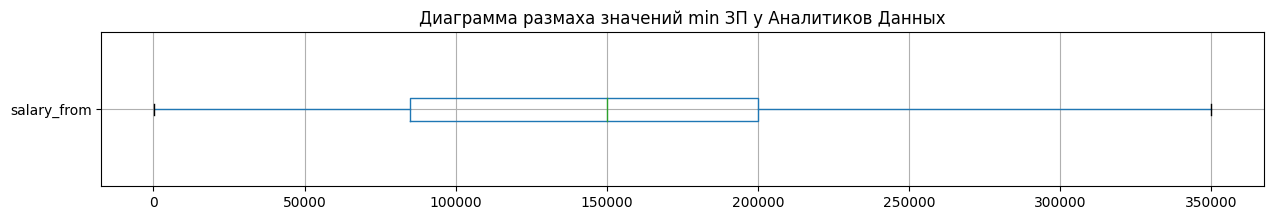

In [103]:
fig, ax = plt.subplots(figsize = (15,2))
ax = df1[['salary_from']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений min ЗП у Аналитиков Данных');
#ax.set_xlim(330000, 405000)

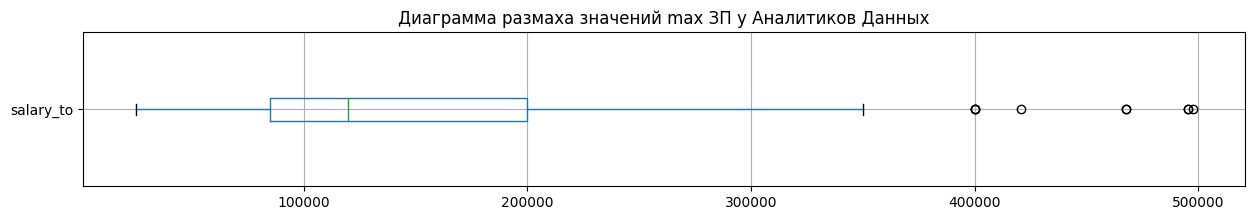

In [104]:
fig, ax = plt.subplots(figsize = (15,2))
ax = df2[['salary_to']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений max ЗП у Аналитиков Данных');
#ax.set_xlim(0, 15000);

### 3.	Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.


Посмотрю, какие уникальные значения в поле experience.

In [107]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]
for label, df in dfs:
    unique_df = df1.experience.unique()

    print(f"\n{label}:")
    print(unique_df)


Системный аналитик:
['Middle (3-6 years)' 'Junior+ (1-3 years)' 'Senior (6+ years)'
 'Junior (no experince)']

Аналитик данных:
['Middle (3-6 years)' 'Junior+ (1-3 years)' 'Senior (6+ years)'
 'Junior (no experince)']


У обеих вакансий 4 одинаковых "грейда" опыта: Джун без опыта, Джун с опытом 1-3 года, Мидл (опыт 3-6 лет) и Сеньор (опыт больше 6 лет).
Посчитаю количество вакансий каждого:

In [147]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

for label, df in dfs:
    grouped_df = df.groupby(['experience']).id.count().to_frame().rename(columns={'id': 'Count'})
    total_vacancies = df['id'].count()
    
    grouped_df.loc['Всего вакансий'] = total_vacancies
    
    print(f"\n{label}:")
    print(grouped_df)


Системный аналитик:
                       Count
experience                  
Junior (no experince)     86
Junior+ (1-3 years)      852
Middle (3-6 years)       933
Senior (6+ years)         44
Всего вакансий          1915

Аналитик данных:
                       Count
experience                  
Junior (no experince)    142
Junior+ (1-3 years)     1091
Middle (3-6 years)       555
Senior (6+ years)         13
Всего вакансий          1801


In [ ]:
Вакансий системного аналитика в предоставленных данных больше

### 4.	Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.


Посчитаю и визуализирую долю каждого грейда в обеих профессиях:

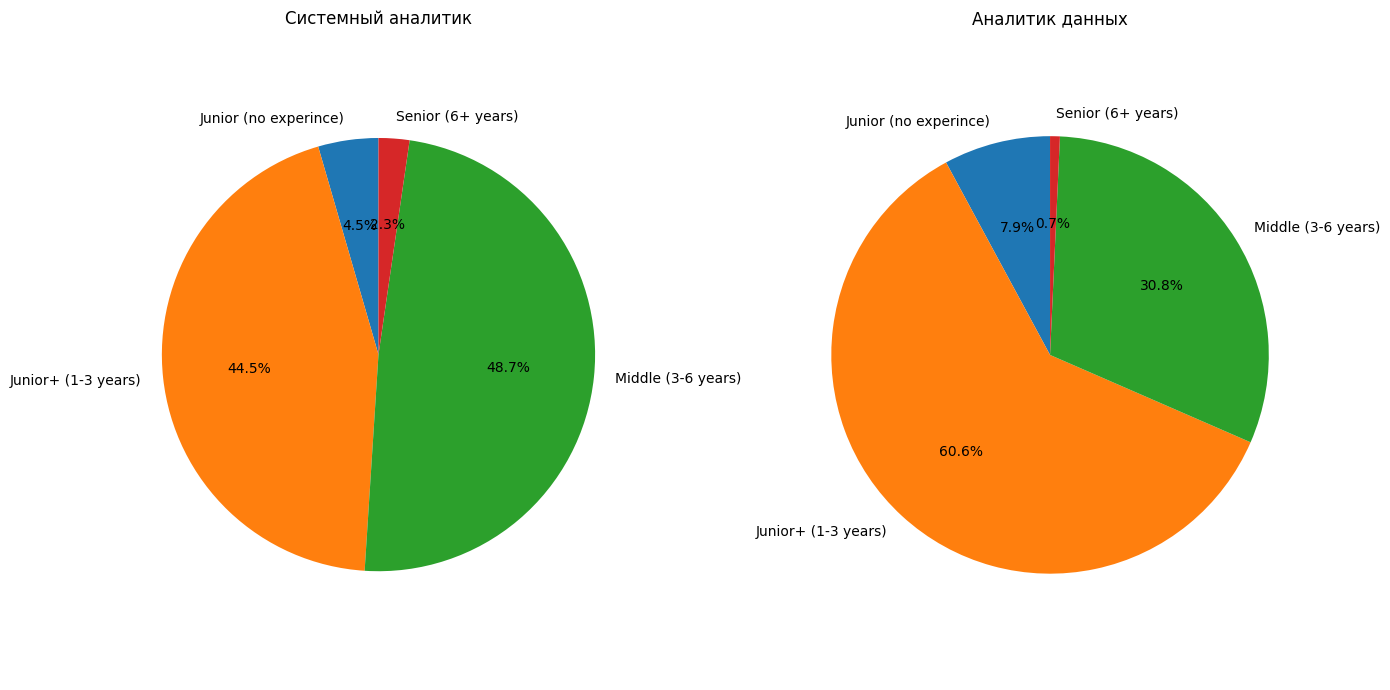

In [145]:
dfs = [('df1', df1, 'Системный аналитик'), ('df2', df2, 'Аналитик данных')]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 строка, 2 столбца

for ax, (df_name, df, title) in zip(axes, dfs):
    qq = df.groupby(['experience']).id.count().to_frame()
    
    ax.pie(qq.id, labels=qq.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{title}')
    ax.axis('equal')  

plt.tight_layout()
plt.show()

Среди системных аналитиков одинаково востребованы мидлы и джуны с опытом (49% и 45% от общего количества вакансий).
Среди же аналитиков данных больше остальных требуются джуны с опытом (61%), а мидлов - всего 31%. Джунов без опыты требуется немного:
5% - у системных аналитиков и 8% - у аналитиков данных. Еще меньше требуется сеньоров: 3% - у системных аналитиков и 1% - у аналитиков данных.

Мне кажется, информация о сеньорах немного искажена - слишком уж мало вакансий для них. 
Предполагаю, что для высококвалифицированных сотрудников иные пути поиска сотрудников.                                                                  

### 5. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

Начну с ТОПа работодателей. Посмотрю 10 работодателей с наибольшим количеством вакансий

In [110]:
datasets = [('Системный аналитик', df1), ('Аналитик данных', df2)]
for name, df in datasets:
    employer_counts = df['employer'].value_counts().head(10)
    print(f'Топ-10 работодателей для {name}:')
    print(employer_counts)
    print('\n')

Топ-10 работодателей для Системный аналитик:
СБЕР                                    95
Т1                                      80
Aston                                   65
Совкомбанк Технологии                   37
ПСБ (ПАО «Промсвязьбанк»)               30
Selecty                                 22
Т-Банк                                  22
Ростелеком Информационные Технологии    18
билайн                                  18
Прикладные технологии                   16
Name: employer, dtype: int64


Топ-10 работодателей для Аналитик данных:
СБЕР                                     243
WILDBERRIES                               43
Ozon                                      34
Банк ВТБ (ПАО)                            28
Т1                                        26
МАГНИТ, Розничная сеть                    24
МТС                                       22
Okko                                      19
Центральный банк Российской Федерации     16
Правительство Москвы                      15
Na

СБЕР - фаворит для обеих профессий. Также большую долю рынка занимают другие банки. 
В Т1 требуются специалисты обеих профессий, но но вакансий системного аналитика в 4 раза больше.
Аналитики данных требуются на маркетплейсах, а системные аналитики особенно нужны в Aston

Визуализирую с помощью гистограмм топ - работодателей, распределение типа занятости и графика работы отдельно для каждого грейда.
Разыми цветами буду отображать грейды: зеленым - джун без опыта, желтым - джун с опытом, оранжевым - мидл, красным - сеньор.
Сделаю гистограммы относительными, чтобы можно было сранивать две профессии.
Рядом выведу графики для двух профессий, чтобы было удобнее.

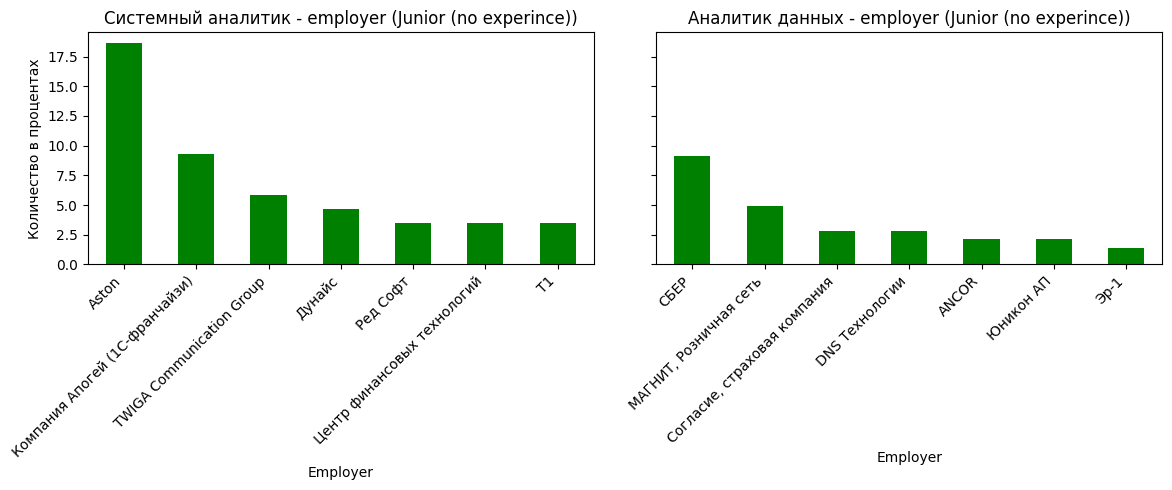

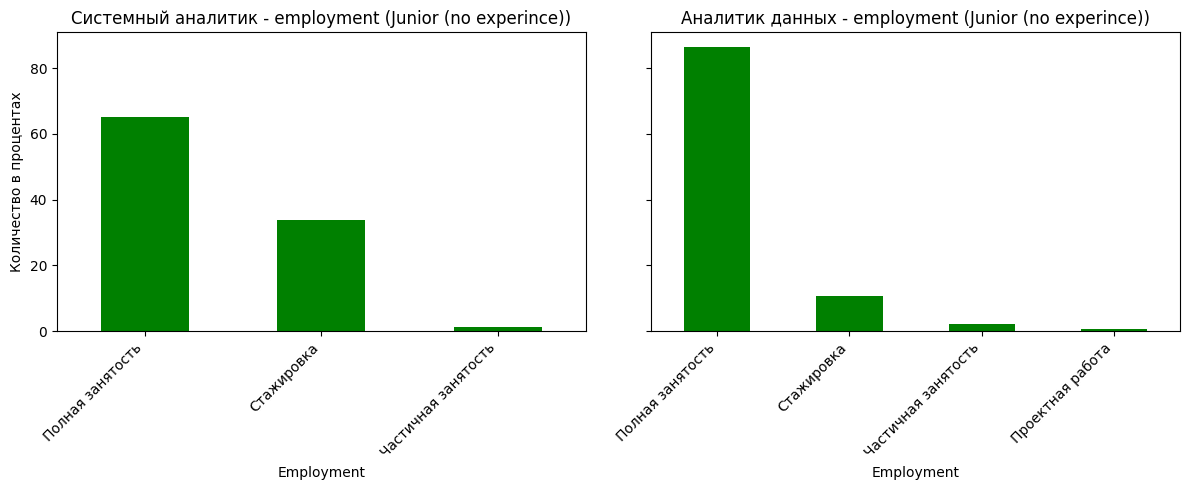

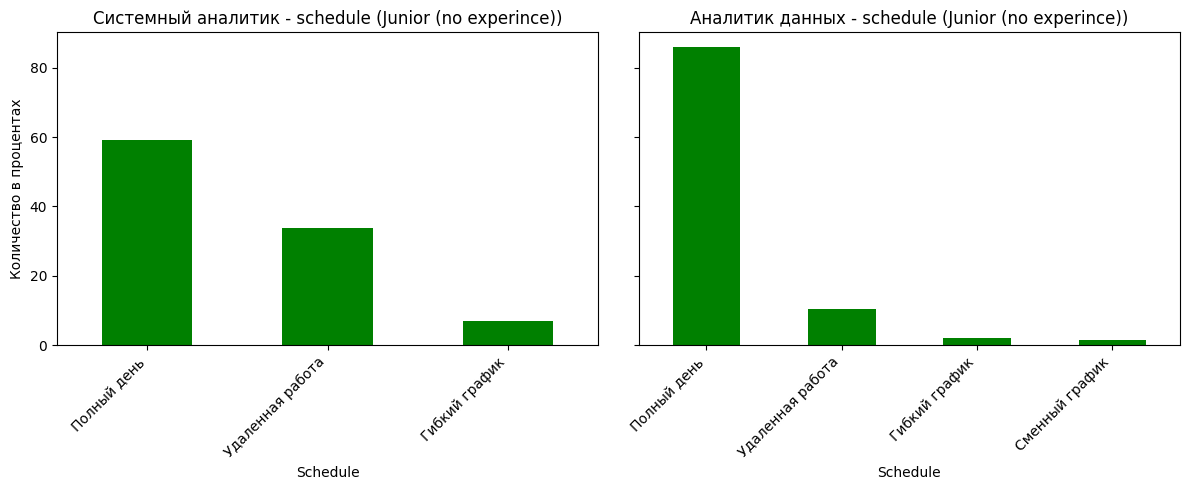

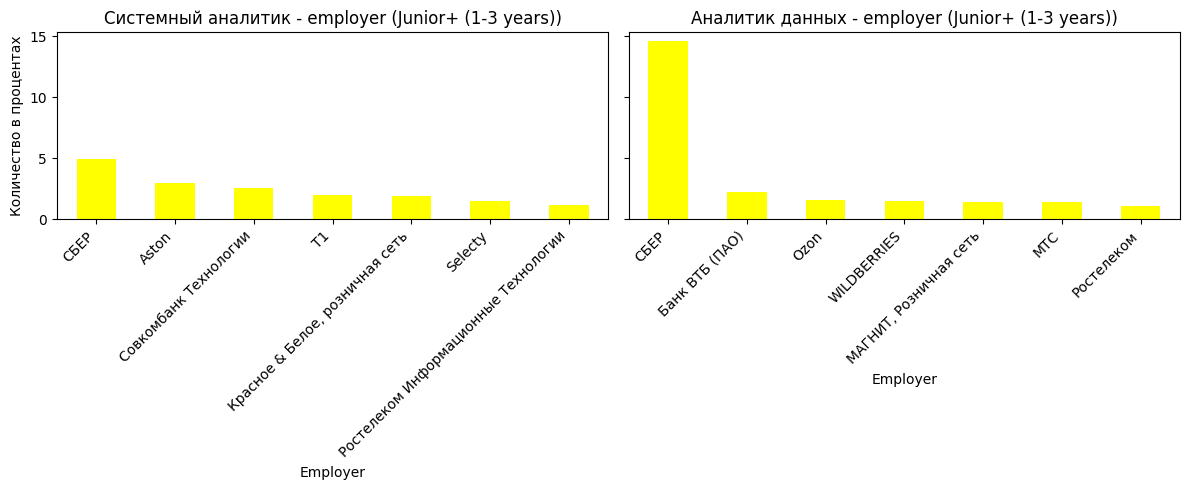

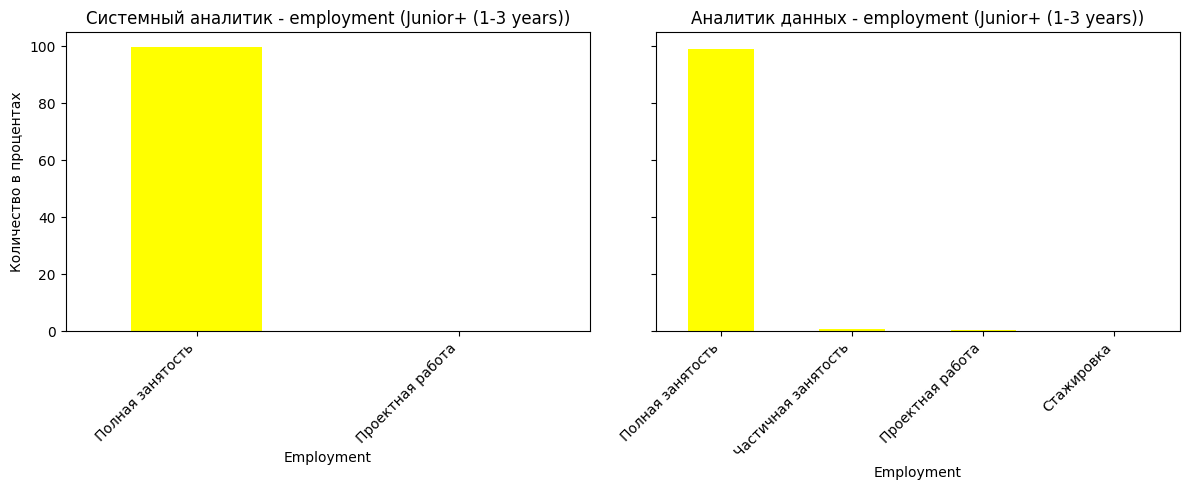

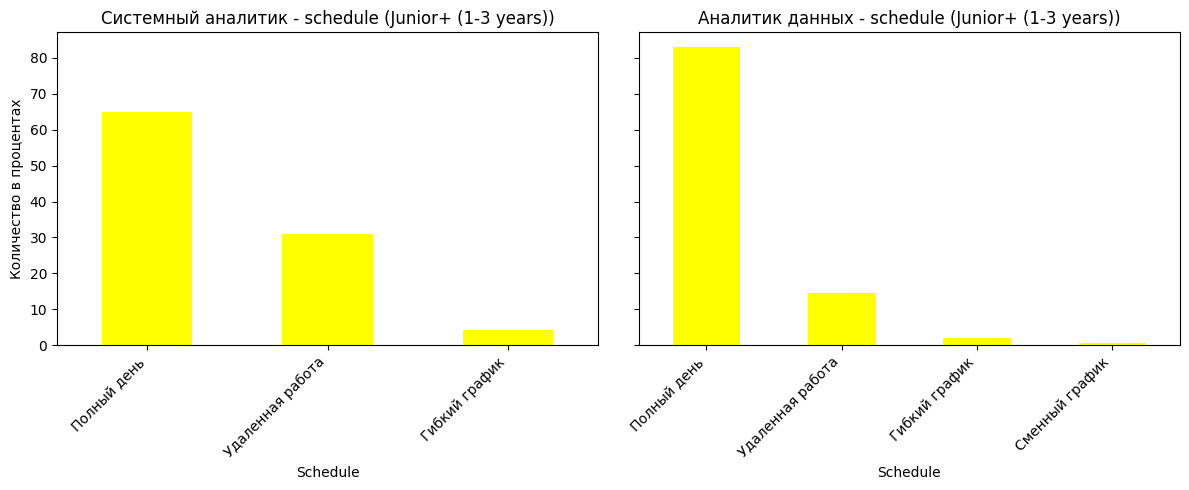

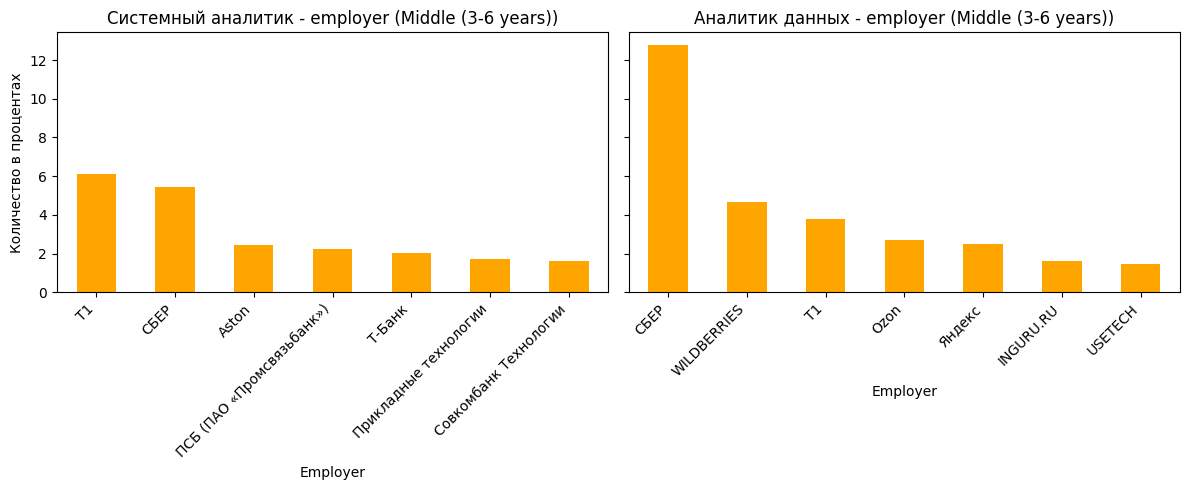

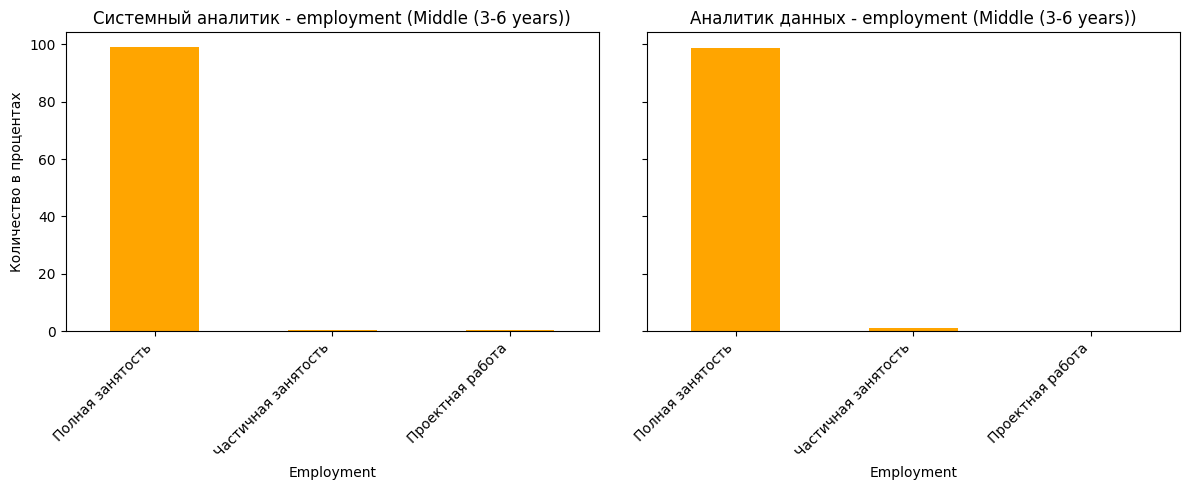

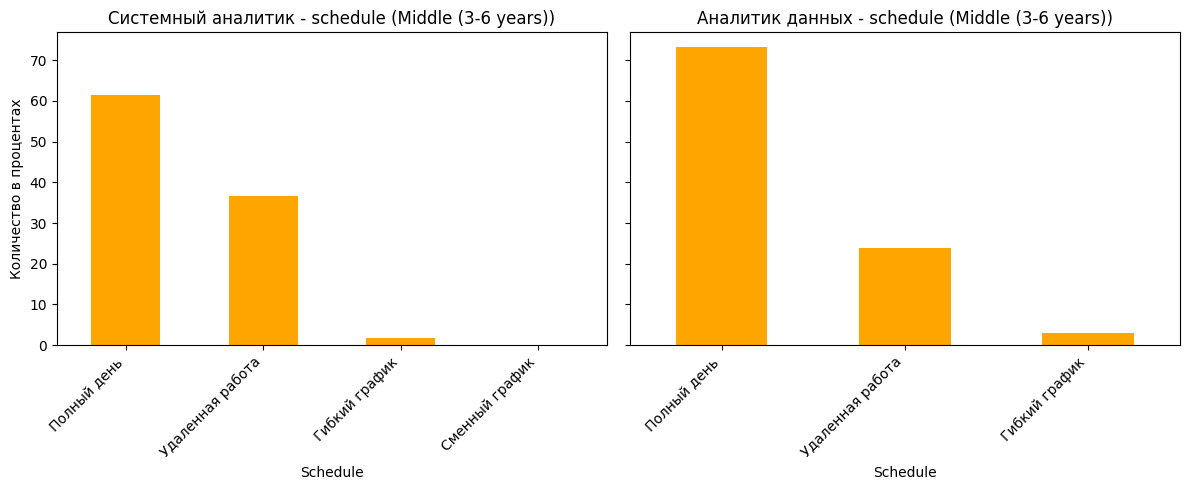

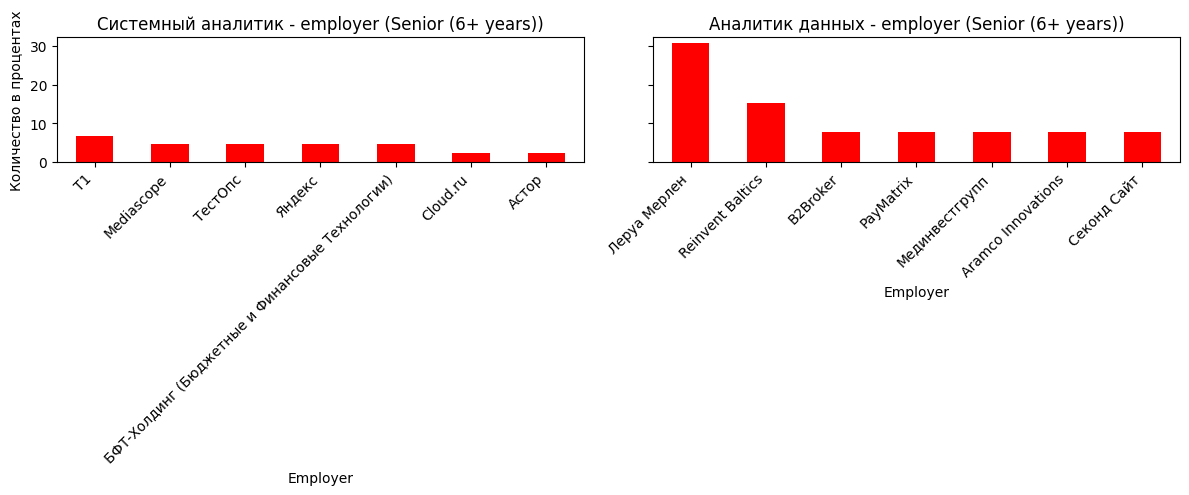

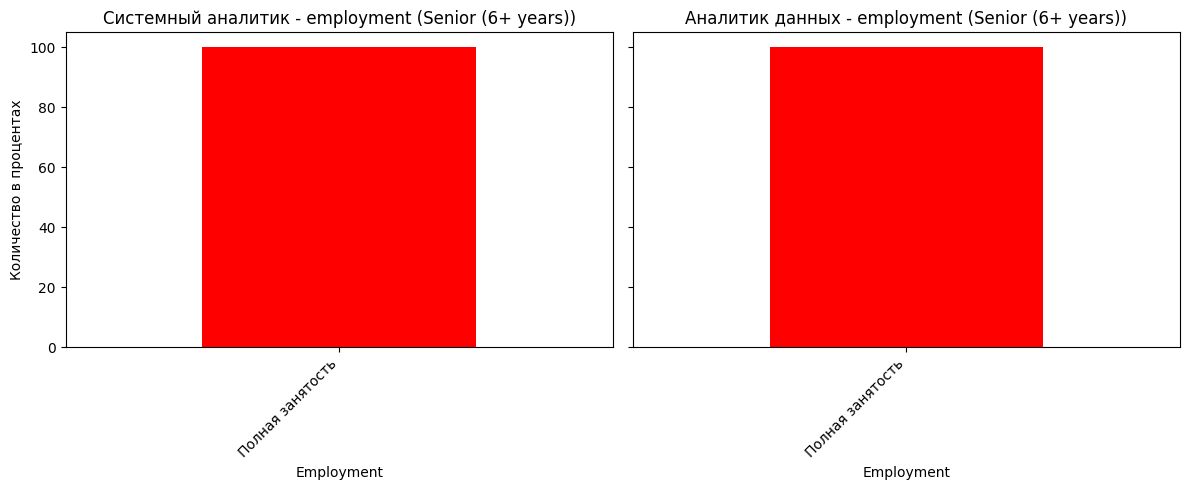

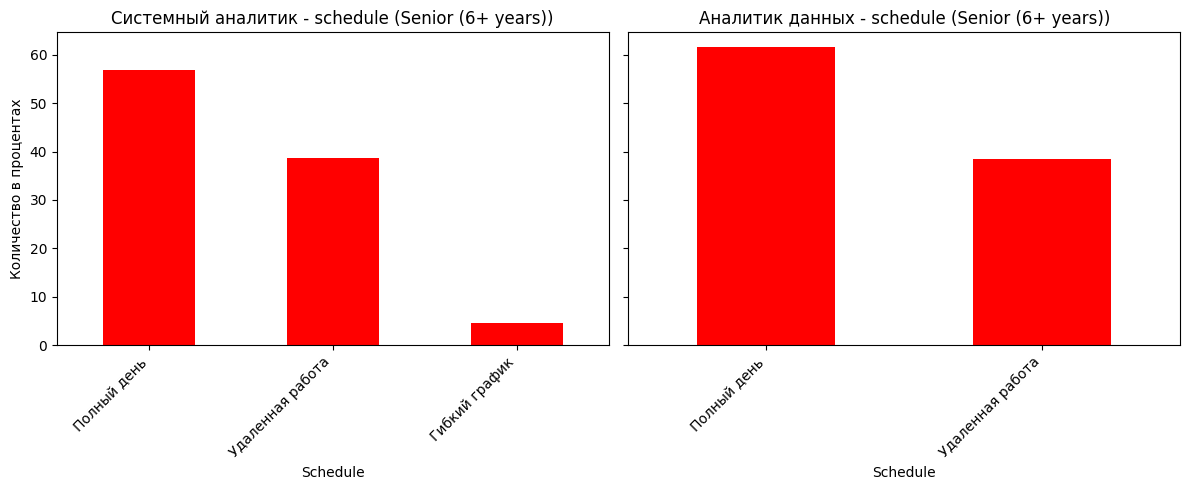

In [148]:
dfs = [('df1', df1, 'Системный аналитик'), ('df2', df2, 'Аналитик данных')]

# Список полей для анализа
fields = ['employer','employment', 'schedule']

experience_levels = ['Junior (no experince)', 'Junior+ (1-3 years)','Middle (3-6 years)', 'Senior (6+ years)']

# Цвета для каждого грейда
colors = {
    'Junior (no experince)': 'green',
    'Junior+ (1-3 years)': 'yellow',
    'Middle (3-6 years)': 'orange',
    'Senior (6+ years)': 'red',   
}

# Цикл для перебора значений experience, полей и DataFrame
for experience in experience_levels:
    for field in fields:
        # Создание графика
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  
        
        for ax, (name, df, title) in zip(axes, dfs):
            
            filtered_df = df[df['experience'] == experience]
            counts = filtered_df[field].value_counts()
            
            # Расчет относительных значений в процентах
            total_counts = counts.sum()
            percentages = (counts / total_counts * 100).head(7)
            
            # Построение гистограммы
            percentages.plot(kind='bar', color=colors[experience], ax=ax)
            ax.set_title(f'{title} - {field} ({experience})')
            ax.set_xlabel(field.capitalize())
            ax.set_ylabel('Количество в процентах')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Выявить среднюю зарплату довольно сложно, потому что есть много пропусков в данных (около 85%).   
Тем не менее проведу расчеты для тех даных, что есть. Посчитаю среднее между полями salary_from и salary_to.
Если значение одного из полей будет отстутсвовать - возьму для расчета финального среднего то, которое присутсвует.
Отдельно усредню по каждому грейду

In [112]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

# Порядок грейдов
experience_order = [
    'Junior (no experince)', 
    'Junior+ (1-3 years)', 
    'Middle (3-6 years)', 
    'Senior (6+ years)'
]

for label, df in dfs:
    print(f"Результаты для {label}:\n")
    for exp in experience_order:
        if exp in df['experience'].unique():
            
            df_filtered = df[df['experience'] == exp].copy()
            
            df_filtered['average_salary'] = df_filtered[['salary_from', 'salary_to']].mean(axis=1, skipna=True)
            
            # Вычисление средней зарплаты для грейда
            mean_salary = df_filtered['average_salary'].mean()
            
            print(f"{exp}: Средняя зарплата = {mean_salary:.2f}")
    
    print("\n" + "-"*50 + "\n")


Результаты для Системный аналитик:

Junior (no experince): Средняя зарплата = 86555.00
Junior+ (1-3 years): Средняя зарплата = 152374.99
Middle (3-6 years): Средняя зарплата = 248567.71
Senior (6+ years): Средняя зарплата = 265014.00

--------------------------------------------------

Результаты для Аналитик данных:

Junior (no experince): Средняя зарплата = 69570.01
Junior+ (1-3 years): Средняя зарплата = 110080.69
Middle (3-6 years): Средняя зарплата = 200177.24
Senior (6+ years): Средняя зарплата = 191666.67

--------------------------------------------------



Результаты мне кажутся правдоподобными. Грейд выше имеет зарплату больше предыдущего. 
"Выпадает" значение у сеньоров аналитков данных - ЗП ниже мидлов, это обусловлено дефицитом данных (вакансий сеньоров всего 13) 

### 6.	Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

Посчитаю сколько всего вакансий с указанием жестких и мягких навыков. Считаю строки, в которых непустые значения в полях skills

In [154]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

for label, df in dfs:
    print(f"Результаты для {label}:\n")
    
    # Заполнение пустых значений
    df['hard_ski'] = df['hard_ski'].fillna('')
    df['soft_ski'] = df['soft_ski'].fillna('')
    
    # Подсчет количества непустых записей
    total_hard_skills = df['hard_ski'].apply(lambda x: int(bool(x.strip()))).sum()
    total_soft_skills = df['soft_ski'].apply(lambda x: int(bool(x.strip()))).sum()
    
    print(f"Количество вакансий с Hard Skills: {total_hard_skills}")
    print(f"Количество вакансий с Soft Skills: {total_soft_skills}\n")

Результаты для Системный аналитик:

Количество вакансий с Hard Skills: 570
Количество вакансий с Soft Skills: 1427

Результаты для Аналитик данных:

Количество вакансий с Hard Skills: 418
Количество вакансий с Soft Skills: 588



Для системного аналитика вакансий с указанием Soft Skills почти в 3 раза больше, чем вакансий с Hard Skills. Для аналитиков данных же - лишьв 1,4 раза

Посчитаю количество вакансий с разными навыками отдельно для каждого грейда

In [151]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

for label, df in dfs:
    print(f"Результаты для {label}:\n")
    
    df['hard_ski'] = df['hard_ski'].fillna('')
    df['soft_ski'] = df['soft_ski'].fillna('')
    
    unique_experience = df['experience'].unique()
    
    for exp in unique_experience:
        print(f"Опыт: {exp}\n")
        
        df_filtered = df[df['experience'] == exp]
        
        total_hard_skills = df_filtered['hard_ski'].apply(lambda x: 1 if x.strip() else 0).sum()
        total_soft_skills = df_filtered['soft_ski'].apply(lambda x: 1 if x.strip() else 0).sum()
        
        print(f"Количество вакансий с Hard Skills: {total_hard_skills}")
        print(f"Количество вакансий с Soft Skills: {total_soft_skills}\n")

Результаты для Системный аналитик:

Опыт: Middle (3-6 years)

Количество вакансий с Hard Skills: 308
Количество вакансий с Soft Skills: 714

Опыт: Junior+ (1-3 years)

Количество вакансий с Hard Skills: 239
Количество вакансий с Soft Skills: 628

Опыт: Senior (6+ years)

Количество вакансий с Hard Skills: 13
Количество вакансий с Soft Skills: 30

Опыт: Junior (no experince)

Количество вакансий с Hard Skills: 10
Количество вакансий с Soft Skills: 55

Результаты для Аналитик данных:

Опыт: Junior (no experince)

Количество вакансий с Hard Skills: 23
Количество вакансий с Soft Skills: 45

Опыт: Junior+ (1-3 years)

Количество вакансий с Hard Skills: 241
Количество вакансий с Soft Skills: 359

Опыт: Middle (3-6 years)

Количество вакансий с Hard Skills: 146
Количество вакансий с Soft Skills: 175

Опыт: Senior (6+ years)

Количество вакансий с Hard Skills: 8
Количество вакансий с Soft Skills: 9



Для системных аналитиков вакансий с указанными мягкими навыками кратно больше, чем с жесткими. 
Для аналитиков данных же эта разница не такая большая, только для джунов без опыта "мягких" в 2 раза больше, чем "жестких", а для сеньоров и мидлов - одинаково

Теперь хочу учесть, что в полях навыки перечислены через запятую. 
Также посчитаю количество навыков отдельно для каждого грейда и визуализирую.
Построю относительные гистрограммы, которые показывают, какую долю вакансии с указанием тех или иных навыков составляют от общего числа вакансий определенного грейда.
Выбрал относительные гистограммы. чтобы нормировать на различающееся количество вакансий у двух специальностей.
Рядом будут изображены две специальности для удобства сравнения

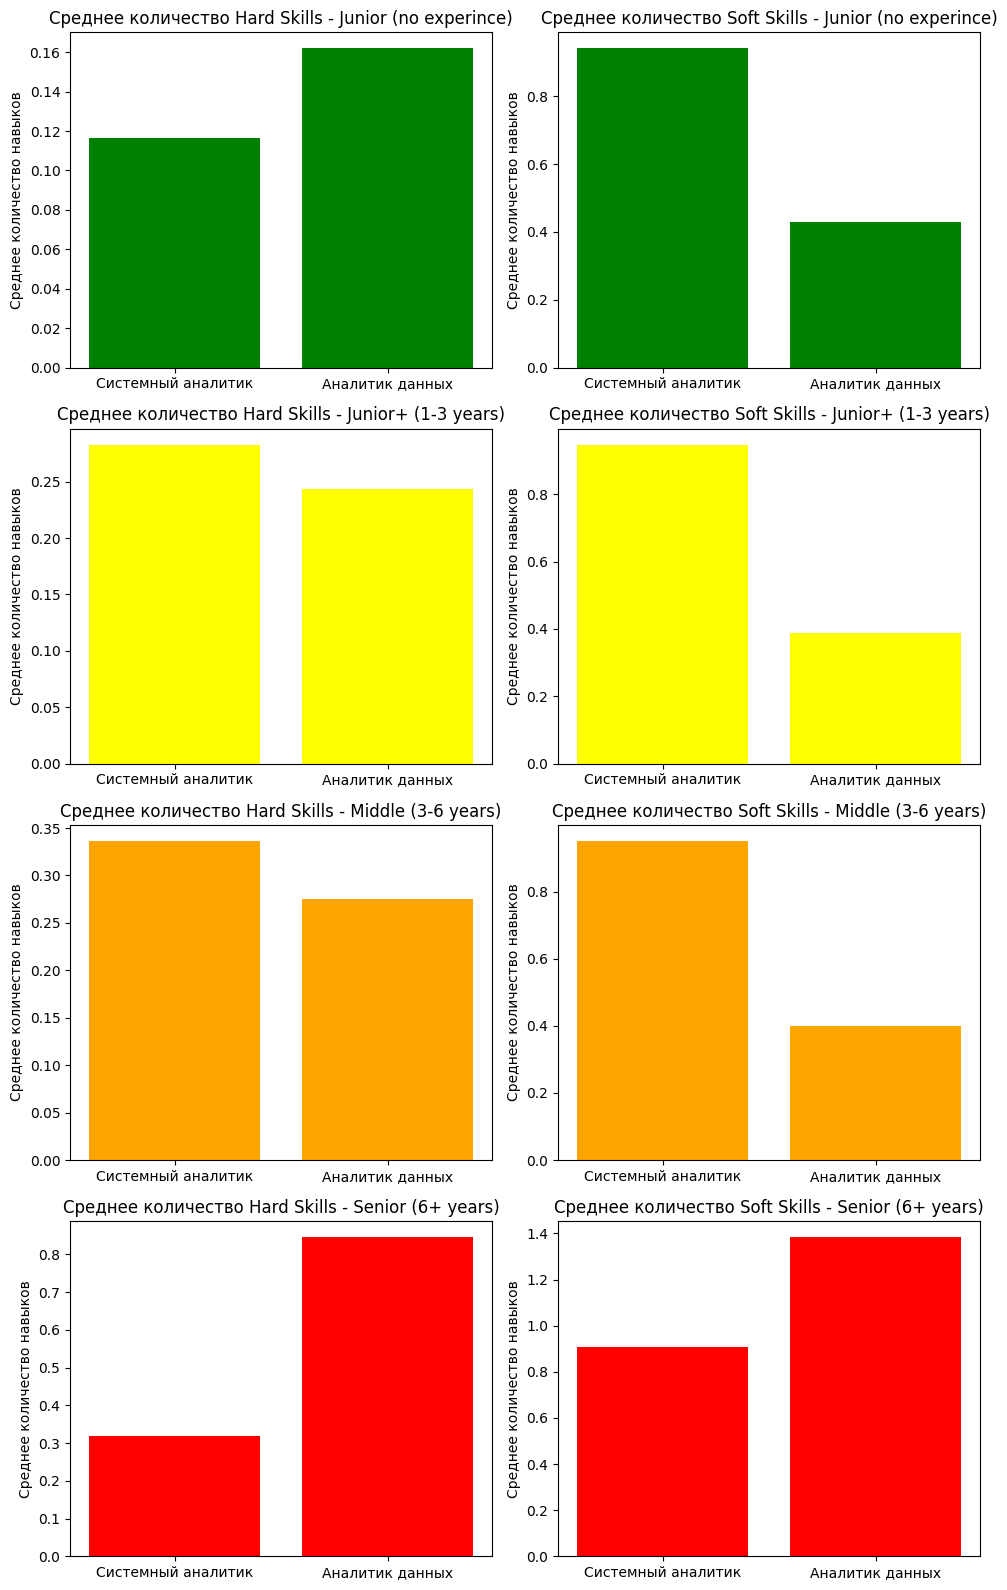

In [115]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

# Порядок уникальных значений опыта
experience_order = [
    'Junior (no experince)',
    'Junior+ (1-3 years)',
    'Middle (3-6 years)',
    'Senior (6+ years)'
]
# Цвета для каждой категории опыта
colors = {
    'Junior (no experince)': 'green',
    'Junior+ (1-3 years)': 'yellow',
    'Middle (3-6 years)': 'orange',
    'Senior (6+ years)': 'red'
}
# Пустые списки для хранения данных
hard_skills_averages = {exp: [] for exp in experience_order}
soft_skills_averages = {exp: [] for exp in experience_order}

# Цикл для обработки каждого DataFrame и опыта
for label, df in dfs:
    df['hard_ski'] = df['hard_ski'].fillna('')
    df['soft_ski'] = df['soft_ski'].fillna('')
    
    for exp in experience_order:
        df_filtered = df[df['experience'] == exp].copy()
        
        # Подсчет количества навыков в каждой строке
        df_filtered.loc[:, 'hard_skills_count'] = df_filtered['hard_ski'].apply(lambda x: len([skill.strip() for skill in x.split(',') if skill.strip()]))
        df_filtered.loc[:, 'soft_skills_count'] = df_filtered['soft_ski'].apply(lambda x: len([skill.strip() for skill in x.split(',') if skill.strip()]))
        
        # Вычисление среднего количества навыков
        avg_hard_skills = df_filtered['hard_skills_count'].mean()
        avg_soft_skills = df_filtered['soft_skills_count'].mean()
        
        hard_skills_averages[exp].append(avg_hard_skills)
        soft_skills_averages[exp].append(avg_soft_skills)

# Строю график
fig, axes = plt.subplots(len(experience_order), 2, figsize=(10, len(experience_order) * 4))

for i, exp in enumerate(experience_order):
    # Визуализация для Hard Skills
    axes[i, 0].bar(['Системный аналитик', 'Аналитик данных'], hard_skills_averages[exp], color=colors[exp])
    axes[i, 0].set_title(f"Среднее количество Hard Skills - {exp}")
    axes[i, 0].set_ylabel("Среднее количество навыков")
    
    # Визуализация для Soft Skills
    axes[i, 1].bar(['Системный аналитик', 'Аналитик данных'], soft_skills_averages[exp], color=colors[exp])
    axes[i, 1].set_title(f"Среднее количество Soft Skills - {exp}")
    axes[i, 1].set_ylabel("Среднее количество навыков")

plt.tight_layout()
plt.show()

Джун без опыта: в вакансиях системного аналитика требуется значительно больше мягких навыков, чем жестких; а у аналитиков данных - наоборот.

Джун с опытом: для обеиз специальностей требуется примерно одинаковое число жестких навыков, а вот мягких нужно больше системным аналитикам

Мидл: такое же распределение, как и у джунов с опытом для обеиз специальностей. Только возросло относительно количество жестких навыков, что логично: более опытный сотрудник, больше специальных умений

Сеньор: для аналитиков данных больше требования и по мягким и по жестким навыкам. И как ни странно, мягкие навыки встречаются в вакансиях чаще, чем жесткие. Впрочем, как и у всех других грейдов

### 7.	Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

Выделю каждый навык отдельно, разбивая строки разделителем ','. Подсчитаю, сколько раз встречается тот или иной навык для каждого грейда отдельно.
Посторю гисторгаммы, на которых отложены навыки и сколько раз они встречаются в вакансиях

В задании почему-то не требуется рассмотреть key-skills. Однако, там есть и soft и hard навыки.
Я визуализирую топ-7 ключевых, мягких и жестких навыков для каждого грейда и для каждой профессии. Вертикальную ось гистограмм сделаю общей.
В выводе выделю "главные" навыки

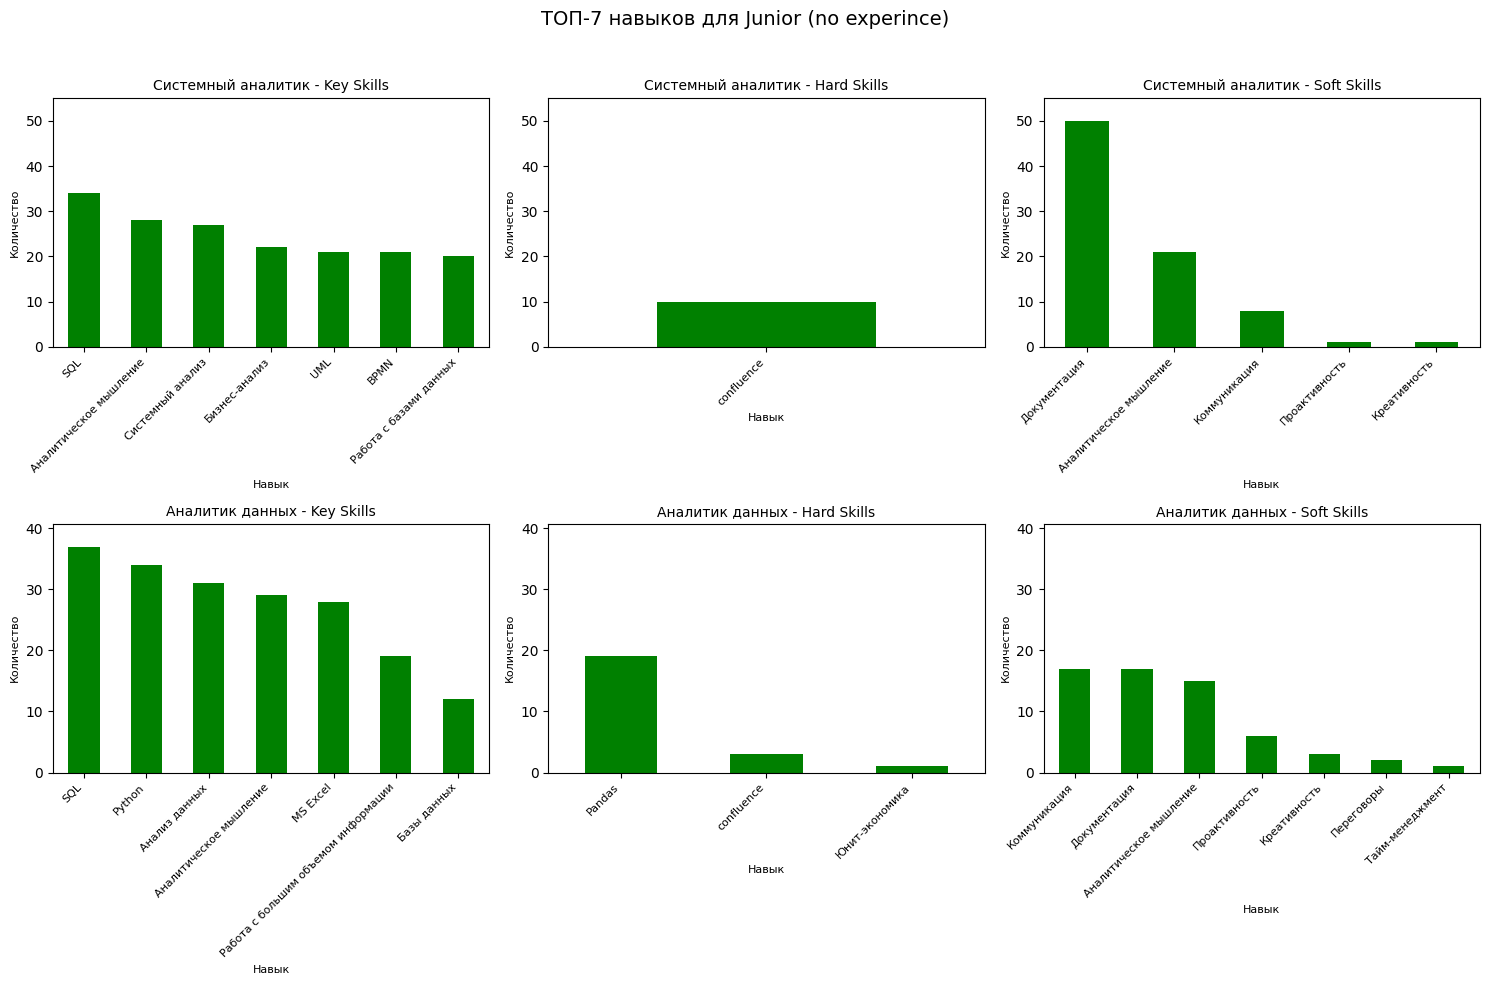

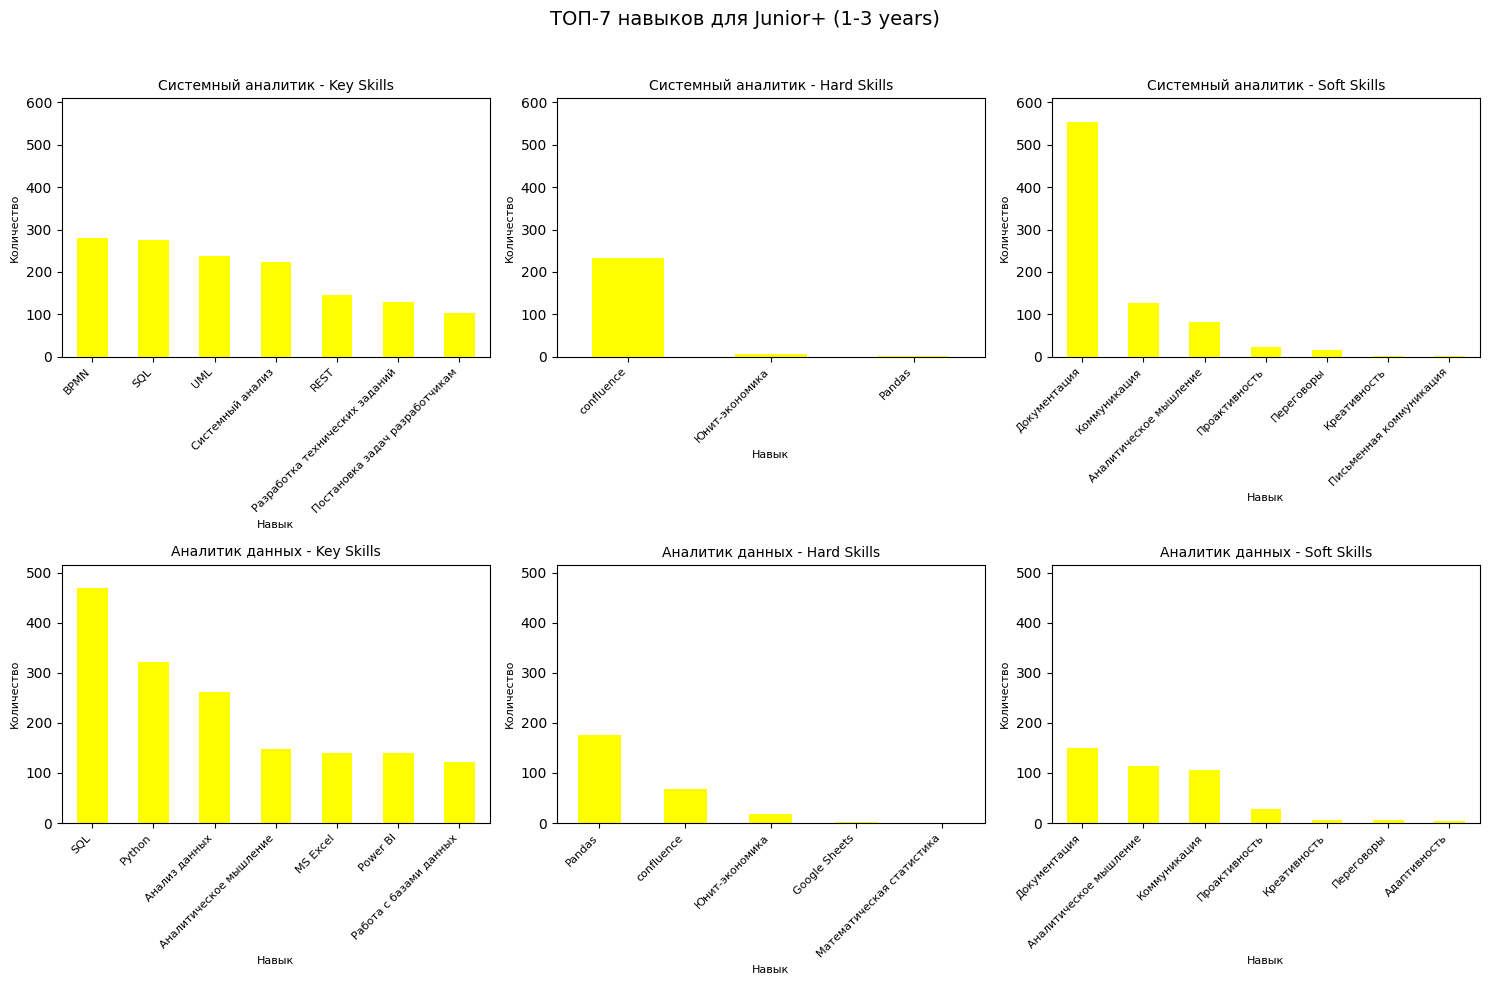

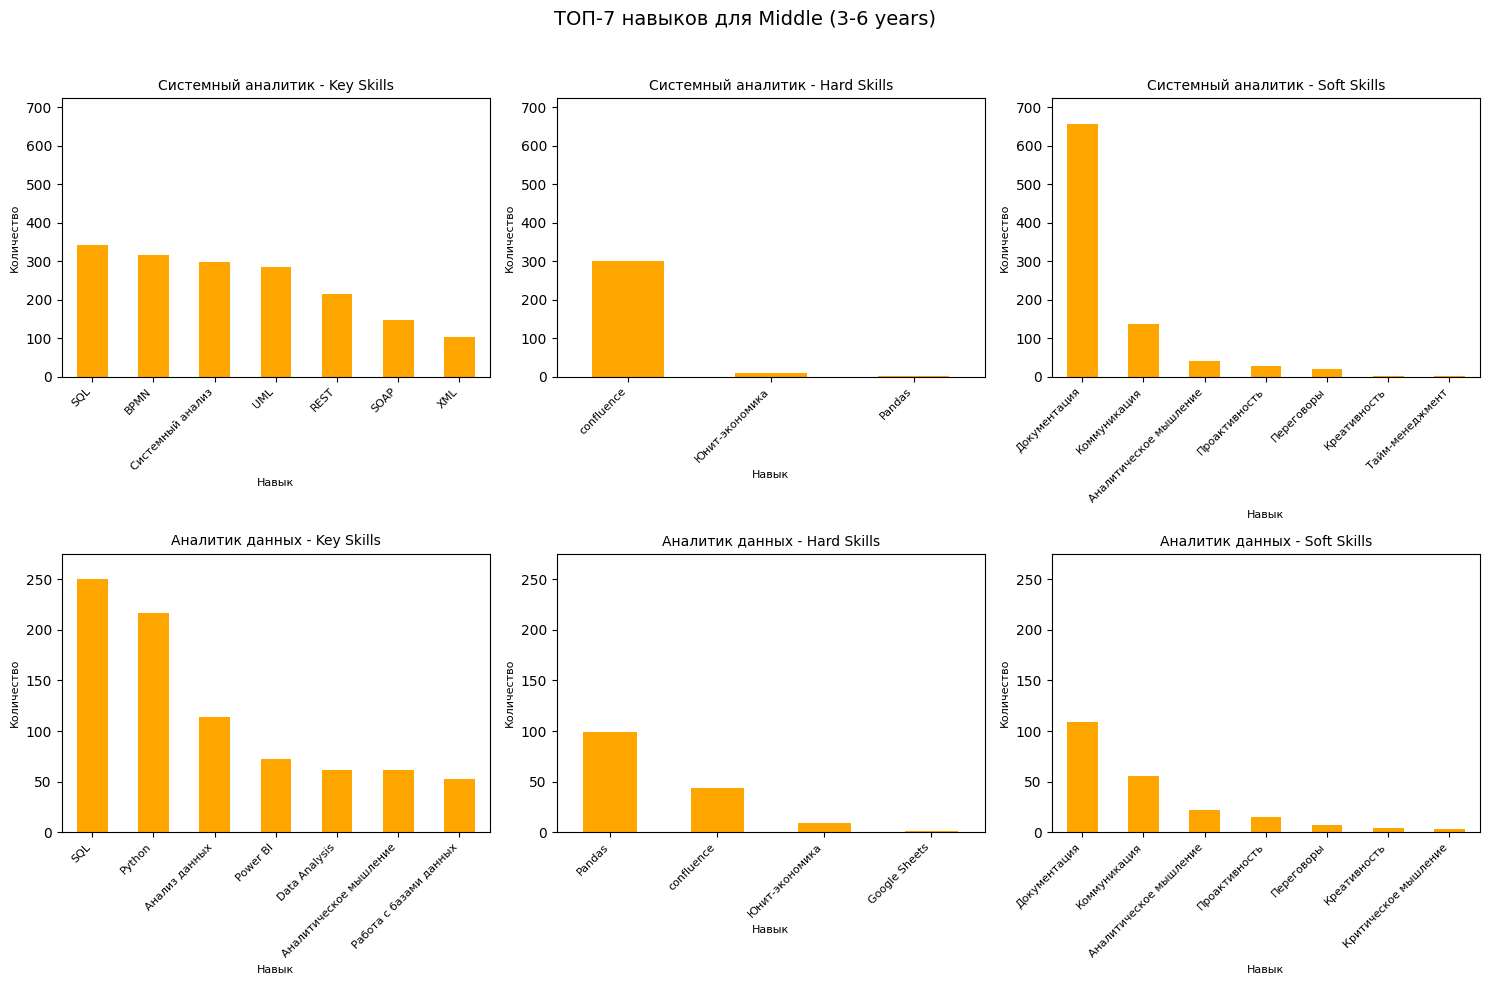

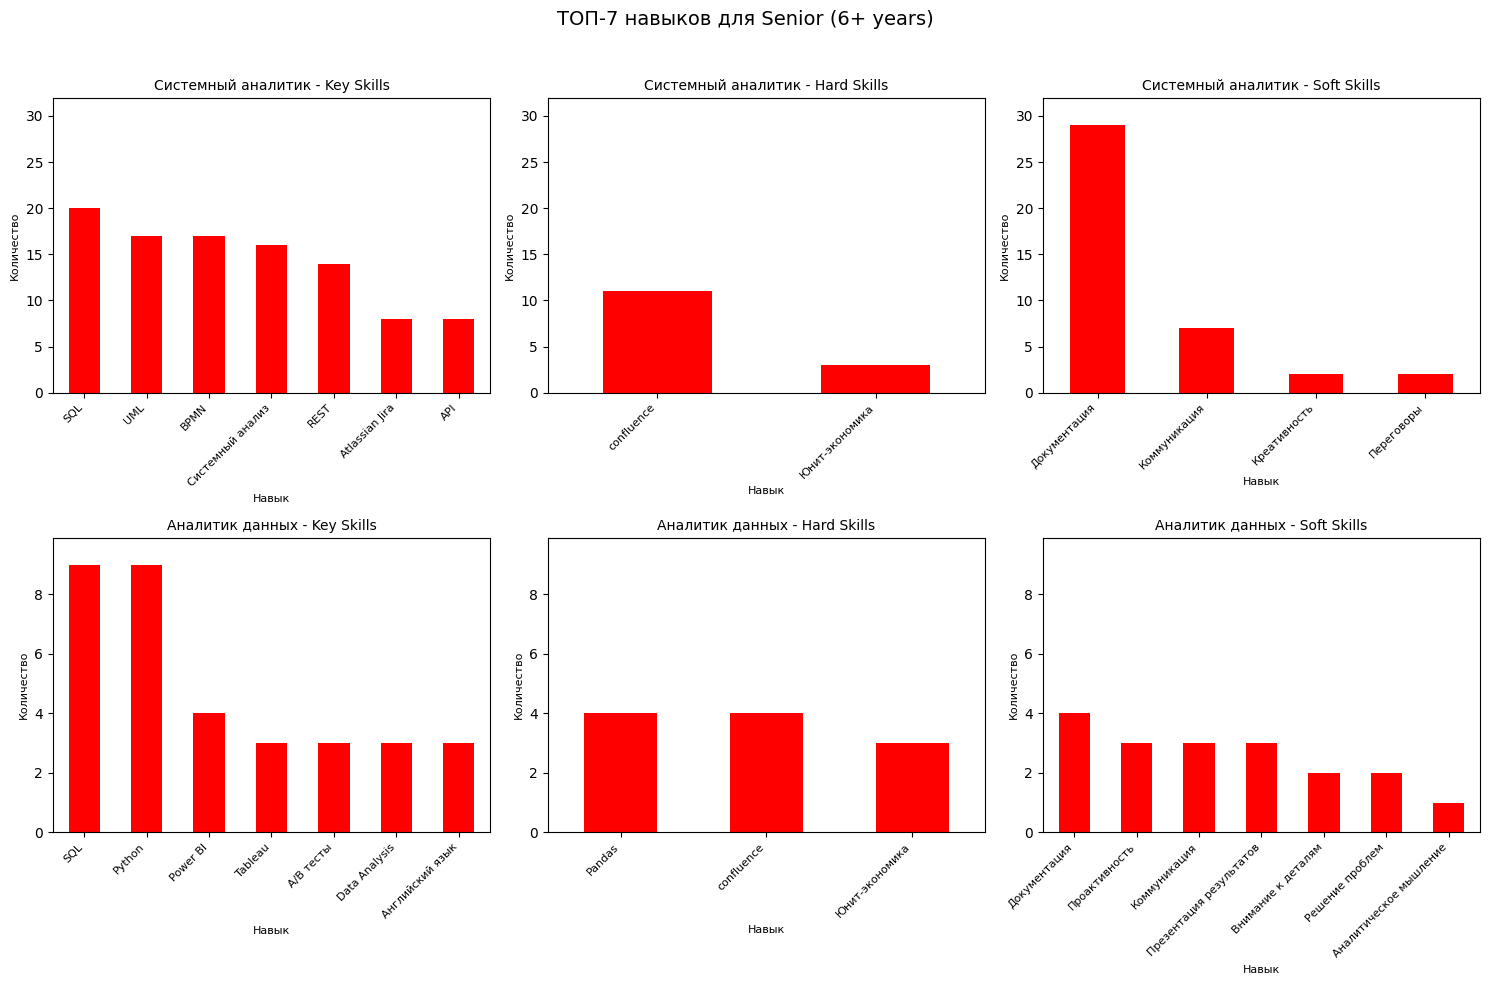

In [176]:
dfs = [('Системный аналитик', df1), ('Аналитик данных', df2)]

# Цвета для каждого уровня опыта
colors = {
    'Junior (no experince)': 'green',
    'Junior+ (1-3 years)': 'yellow',
    'Middle (3-6 years)': 'orange',
    'Senior (6+ years)': 'red',
}
# Уникальные значения опыта в фиксированном порядке
experience_order = [
    'Junior (no experince)', 
    'Junior+ (1-3 years)', 
    'Middle (3-6 years)', 
    'Senior (6+ years)'
]

for exp in experience_order:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=False)  
    fig.suptitle(f'ТОП-7 навыков для {exp}', fontsize=14)
    
    for i, (label, df) in enumerate(dfs):
        df_filtered = df[df['experience'] == exp].copy() 

        # Заполнение пропусков
        df_filtered['key_ski'] = df_filtered['key_ski'].fillna('')
        df_filtered['hard_ski'] = df_filtered['hard_ski'].fillna('')
        df_filtered['soft_ski'] = df_filtered['soft_ski'].fillna('')
        
        # Обработка навыков
        key_skills = df_filtered['key_ski'].str.cat(sep=', ').split(', ')
        key_skills = [skill.strip() for skill in key_skills if skill.strip()]
        key_skills_series = pd.Series(key_skills).value_counts().head(7)

        hard_skills = df_filtered['hard_ski'].str.cat(sep=', ').split(', ')
        hard_skills = [skill.strip() for skill in hard_skills if skill.strip()]
        hard_skills_series = pd.Series(hard_skills).value_counts().head(7)
        
        soft_skills = df_filtered['soft_ski'].str.cat(sep=', ').split(', ')
        soft_skills = [skill.strip() for skill in soft_skills if skill.strip()]
        soft_skills_series = pd.Series(soft_skills).value_counts().head(7)

        # Определение максимального значения на основе процентилей
        max_y_value = max(
            key_skills_series.max(),
            hard_skills_series.max(),
            soft_skills_series.max()
        ) * 1.1  
    
        # Построение гистограмм
        # Ключевые навыки
        ax_key = axes[i, 0]
        key_skills_series.plot(kind='bar', ax=ax_key, color=colors.get(exp))
        ax_key.set_title(f'{label} - Key Skills', fontsize=10)
        ax_key.set_xlabel('Навык', fontsize=8)
        ax_key.set_ylabel('Количество', fontsize=8)
        ax_key.set_ylim(0, max_y_value)
        ax_key.set_xticks(ax_key.get_xticks())
        ax_key.set_xticklabels(ax_key.get_xticklabels(), rotation=45, ha='right', fontsize=8)

        # Жесткие навыки
        ax_hard = axes[i, 1]
        hard_skills_series.plot(kind='bar', ax=ax_hard, color=colors.get(exp))
        ax_hard.set_title(f'{label} - Hard Skills', fontsize=10)
        ax_hard.set_xlabel('Навык', fontsize=8)
        ax_hard.set_ylabel('Количество', fontsize=8)
        ax_hard.set_ylim(0, max_y_value)
        ax_hard.set_xticks(ax_hard.get_xticks())
        ax_hard.set_xticklabels(ax_hard.get_xticklabels(), rotation=45, ha='right', fontsize=8)

        # Мягкие навыки
        ax_soft = axes[i, 2]
        soft_skills_series.plot(kind='bar', ax=ax_soft, color=colors.get(exp))
        ax_soft.set_title(f'{label} - Soft Skills', fontsize=10)
        ax_soft.set_xlabel('Навык', fontsize=8)
        ax_soft.set_ylabel('Количество', fontsize=8)
        ax_soft.set_ylim(0, max_y_value)
        ax_soft.set_xticks(ax_soft.get_xticks())
        ax_soft.set_xticklabels(ax_soft.get_xticklabels(), rotation=45, ha='right', fontsize=8)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)  # Увеличение нижнего отступа для меток
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Джун без опыта: общие для двух специальностей жесткие навыки: SQL (он лидирует среди остальных навыков), работа с базами данных, confluence. 
У аналитиков данных (АД) Python на втором месте по частоте встречаемости, за ним - Excel и Pandas. Системным аналитикам (СА) может потребоваться UML и BPMN.
Касательно мягких навыков: документация, аналитическое мышление, проактивность и коммуникация и креативность требуются для обеих специальностей.
У аналитика данных документация и коммуникация одинаково самые важные, а у системных аналитиков - лидирует "с отрывом" документация.
В ключевых навыках у СА - системный анализ и бизнес аналаиз, а у АД - просто анализ данных

Джун с опытом: самым важным жестким навыком у СА становится (по сравнению с предыдущим грейдом) BPMN, примерно на этом же уровне нужен SQL, дальше UML и confluence.
Добавился REST, постановка технических заданий и постановка задач разработчикам.
У АД, по-прежнему,  - SQL, Python, Pandas, Excel. Добавился Power BI
Среди мягких навыков самым частым "с большим отрывом" у CА является документация. У АД также - аналитическое мышление, документация, коммуникация.

Мидл: распределение Топа жестких навыков у СА - примерно такое же, как грейдом ниже. Добавился SOAP и XML.
У АД также лидируют SQL и Python
Мягкие - примерно такое же распределение как у джунов с опытом: документация лидирует у обеих специальностей.

Сеньор: в жестких навыках у CA все те же навыки:, SQL, UML, BPMN REST, confluence. Добавилась API и Atlassian Jira
У АД к прежнему распределению добавились Tableau и А\В тесты, 
лидируют SQL и Python, за ними примерно равные позиции занимают Pandas, confluence и юнит-экономика, BI, А\В тесты.
Среди мягких навыков у обеих специальностей лидирует документация, однако у СА - с ольшим "отрывом". 
У аналитиков данных добавились: презентация результата и внимание к деталям.

### 8.	Выводы

В предоставленных данных вакансий Системного аналитика (СА) больше, чем Аналитика данных (АД): 1915 и 1801 соответственно.
У обеих вакансий 4 одинаковых "грейда" опыта: Джун без опыта, Джун с опытом 1-3 года, Мидл (опыт 3-6 лет) и Сеньор (опыт больше 6 лет)

Среди системных аналитиков одинаково востребованы мидлы и джуны с опытом (49% и 45% от общего количества вакансий).
Среди же аналитиков данных больше остальных требуются джуны с опытом (61%), а мидлов - всего 31%. Джунов без опыты требуется немного: 5% - у СА и 8% - у АД. 
Еще меньше требуется сеньоров: 3% - у системных аналитиков и 1% - у аналитиков данных. Малое количество данных, вероятно, искажеает анализ данного грейда.

Неполная занятость (стажировка и частичная занятость) есть только у джунов без опыта. Для остальных грейдов требуется полная занятость.
Для всех вакансий преобладает график работы "полный день", также присутсвует значительная часть, примерно 30 % для каждого грейда и специальнсоти, "удаленной работы". 
Удаленной работы у аналитиков данных меньше.
Больше всего вакансий от следующих работодателей: Сбер, Т1, Aston. Много вакансий от других банков, маркетплейсов, и компаний связи. Большим компаниям чаще требуются люди с опытом. 

Зарплата у СА выше, чем у АД в каждом грейде. Для СА и АД средние зарплаты в тысячах рублей таковы: 
Джун без опыта - 87 и 70, 
Джун с опытом 1-3 года - 152 и 110
Мидл (опыт 3-6 лет)  - 249 и 200
Сеньор (опыт больше 6 лет) - 265 и 191 - данных по сеньорам не хватает, недостоверный результат
Зарплата с грейдом возрастает, также она зависит от региона.

Сравнивая вакансии по набору навыков, можно сказать следующее:
Различных hard-skills требуется больше, чем soft-skills в каждом грейде и обеих специальностях. 
С увеличением грейда увеличивается набор необходимых hard-skills, а количество требуемых soft-skills сокращается. 
В key-skills чаще указываются жесткие навыки.

Среди общих для СА и АД навыков можно выделить SQL, он в топе среди жестких навыков для всех грейдов и специальностей. Так что, SQL - это первое, что надо изучать подходя к работе в IT.
Навык  confluence встречается во всех вакансиях, но для СА имеет большую значимость, примерно такую же, как SQL. У всех грейдов встречается, но редко, юнит-экономика.
Также общим для всех грейдом и специальностей является мягкий навых "документация" - тоже во всех грейдах и специальностях. 
Часто упоминается "аналитическое мышление", "проактивность"  и "коммуникация".                                                                       

Про специальность АД можно сказать следующее: необходимыми являются Python и  Pandas - это требование в подавляющем большинстве вакансий, дополнительно - работа с базами данных и excel, для всех грейдов. 
Кандидатам с опытом также неплохо владеть BI -системами.
                                                                          
У СА есть ряд специфических инструменов (жестких навыков), число которых возрастает с грейдом: по уменьшению востребованнности -> BPMN, UML, REST, SOAP, XML, Atlassian Jira, API
Даже от людей без опыта требуются BPMN и UML.

Обобщая, можно сказать, что специальности Аналитик данных и Системный аналитик имеют общие черты: некоторые жесткие и мягкие навыки, некоторые работодатеди нуждаются в обеих специальностях, полный рабочий день. Однако, мне показалось, что различий больше. Начиная от распределения требуемых грейдов вакансий - среди СА требуются более опытные кандидаты.
Жесткие навыки у СА специфичные, зарплата у них выше, вакансий с удаленной работы больше.